#### What is the experimental protocol used and how was it carried out?

*   load data into my workspace then understand its structure .
*   Dataset contains masked data and target varianbe, donation (donate or not)   

#### Approach:

*   found a way to simplify masked data to much smaller categories that represent the dataset and don't a lot of information
*   then encode these data to format that would be ready to train on. Splitting data to train and test
*   finally evaluate the model


### Problem Formulation
I tried to predict donation(classification problem) 

input: masked data

output: predict Donation

Data Mining function: extract features from Masked data.

Challenges: I tried to convert all masked data to categorical because I thought that numerical/Continuous data would not be reasonable to have.


the impact: these problem can bias the model or make it really slow

ideal solution: if the dataset have numersical values in features like age and years of experience because they can be a game change .

In [33]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

In [2]:
# read Dataset
df = pd.read_excel('task for data scientist.xlsx')
df.head()

,name,location,latest_position,current_company,latest_edu_place,latest_edu_qual,yrs_exp,volunteer_flag,children_flag,Age,...,Is Student,Is Parent,IsAddressAvailable,IsEmailAvailable,IsPhoneAvailable,District,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,donor_or_not
0,f71069a5840386c6ece104de3f2bafc3ecb1ff37f1bc64...,99406be6f8f8044366aef3271ac4109d0538df39276e9e...,cb3e421b1d1c2c3448f323268f972ee3b2a54cc1021bf4...,3a14097e562c77b201d23978b706f07e52133506bf5902...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,e15274dcfe2d0cb541e8aa23fef7aaaa116bfcbc937d35...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,c22cd1ea7268eed0a17f08b05559b6f7939040cf707d5a...,a416ea84421fa7e1351582da48235bac88380a337ec5cb...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,52ebab80b30e4922e932f30f2dd0de3a66dfccdc96c921...,1.0
1,f7e645ca1739c318ae12efa6767cf1e7f38accd55c238c...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,b690285b6e60662df771bc7a6b6ee1cb13f799e3d902ec...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,26c9a96ce053a14dd88a71a4830c9cbed7e1fed7e3f3f8...,1.0
2,7a2987f600f343f47c4bd9c1bb704db28517da1e814f95...,ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91...,27e1c95e64999f594001f3b8fada27406bb96ae8adfded...,78df16cdd1a174c6372267773cf96fc1e7bbcc40a0e935...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,eb1e33e8a81b697b75855af6bfcdbcbf7cbbde9f94962c...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8ab31b5afaea56114427e1f01b81d001b079a0f59539f6...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,648e5bca018ffe4b6db96361d9b1a5245ee72d27e49269...,1.0
3,e1eb1c05e9cd661690a5eca2566f93ff0a6146bd91025b...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,be683e560cde64bff281f929cab1c6588dc9b7057d3cbf...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,8ce86a6ae65d3692e7305e2c58ac62eebd97d3d943e093...,3883138a87732955cea4ec542b22ef82c5342262ca1dab...,...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,d0ff5974b6aa52cf562bea5921840c032a860a91a3512f...,c72ae9676454d7cc0014583a9d0a2e28553d5c62f087c7...,a416ea84421fa7e13

## EDA

In [3]:
df.shape

(1158, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          1158 non-null   object 
 1   location                      1158 non-null   object 
 2   latest_position               1158 non-null   object 
 3   current_company               1158 non-null   object 
 4   latest_edu_place              1158 non-null   object 
 5   latest_edu_qual               1158 non-null   object 
 6   yrs_exp                       1158 non-null   object 
 7   volunteer_flag                1158 non-null   object 
 8   children_flag                 1158 non-null   object 
 9   Age                           1158 non-null   object 
 10  Has 1 Kid                     1158 non-null   object 
 11  Has 2-3 Kids                  1158 non-null   object 
 12  Has More Than 3 Kids          1158 non-null   object 
 13  Alu

In [5]:
# drop missing values
df.dropna(inplace=True)

In [6]:
df['donor_or_not'].value_counts()

1.0    1141
0.0      15
Name: donor_or_not, dtype: int64

In [7]:
# convert donor_or_not to int 
df['donor_or_not'] = df['donor_or_not'].astype('int')

#### among those who do not have donation histories

In [8]:
donat = df['donor_or_not'].value_counts()
fig = px.bar(donat)
fig.show()

In [9]:
# value counts of all columns
for col in df.columns:
  print(col + '------------------')
  print(df[col].value_counts())
  print('------------------')


name------------------
9a1d3491f6067575b516fe2b56baeb62b1623bcd7e892ece5cb3c2a11e361329    2
8777312d990e3f8c1ab303b923bf7eff053e44f8efe0b597a71f1b048d51c66f    2
7952c7d8b24295f9b014215b09411ee801bd85c6cdeb4b4d6285edc4d916cee4    2
55063850816e41b554bbee8f16091b79d45cc3f02e6563aa6ae9064e066d71ea    2
413e6618f6f2241ffff0ea0ac3c1e42fe2f2a42a360e06cb7b4c34c2422b1850    2
                                                                   ..
965114a8639adead423924d52a737be4ed69a65ff26b8677b14db052dd4ca4cd    1
61e5078de545e5702e4f999f1f5d67721c5a848fa6ef5fbd10642ce67948c42e    1
a20a250c46b0f181bb57ee39aafea4ef20642b52343fc3b8cea4b23534883720    1
970b46808c3b2240e5fb8d6aaac2dd6e324fbba314634dd3f412e34aad0794e6    1
40a08be16a574fe980223dc4763605c9dfb1e0f1a2b7b7ee1b3370519e0a9af3    1
Name: name, Length: 1145, dtype: int64
------------------
location------------------
ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91b9eb401bfaebabe438    539
c96dd81db196cca5f57bd4270bbb9d9e9d1b242d67f9364005

## Preprocessing

Removing categorical features which show minimal variation in output variable. 

In [10]:
df.drop(['Is Student', 'IsAddressAvailable', 'Is Parent', 'IsPhoneAvailable', 'IsEmailAvailable',
         'Stay with Parents', 'Has More Than 3 Kids', 'Has 2-3 Kids', 'Has 1 Kid', 'children_flag'], axis=1, inplace=True)

Removing categorical features which show max variation in output variable

In [11]:
df.drop(['name', 'latest_position', 'current_company'], axis=1, inplace=True)

Drop "Age, yrs_exp" as they are numerical values and with such structure they will not be useful

In [12]:
df.drop(['Age', 'yrs_exp'], axis=1, inplace=True)

In [13]:
df.shape

(1156, 12)

Dropping the values that happend little because when encoding, will output sparse dataset

In [14]:
# select samples where the same location exist most 
df = df.loc[(df['location'] == 'ca9f6563c7614c5ef5f033c9aaa1aa21611412da771a91b9eb401bfaebabe438') | (df['location'] == 'c96dd81db196cca5f57bd4270bbb9d9e9d1b242d67f9364005ee1dfdc2632523')]
df.shape

(1065, 12)

Drop District as it didn't provide new information than location

In [15]:
df.drop('District', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df.shape

(1065, 11)

Drop "latest_edu_place" because latest_edu_qual provide enough information also it has more balanced values 

In [17]:
df.drop('latest_edu_place', axis=1, inplace=True)

In [18]:
# select the most repeated Nationality_label_encoded
df = df.loc[(df['Nationality_label_encoded'] == '1f4d86b1e0415f97659988ec13c7753c4bffc5f95d373c3937394ec6ae2c929f') |
        (df['Nationality_label_encoded'] == '648e5bca018ffe4b6db96361d9b1a5245ee72d27e49269c38f307c05c07f7014') |
        (df['Nationality_label_encoded'] == '52ebab80b30e4922e932f30f2dd0de3a66dfccdc96c92133ce409d86262cb234') |
        (df['Nationality_label_encoded'] == '26c9a96ce053a14dd88a71a4830c9cbed7e1fed7e3f3f8a0b0b6a58f3f0f02e6') |
        (df['Nationality_label_encoded'] == 'c23682d6bdb6c3180520659f65b92ef5b93404256af9149e90671937cacf48f4')]

In [19]:
df.shape

(1017, 10)

In [20]:
df = df.loc[df['Marital status_label_encoded'] != '8aed642bf5118b9d3c859bd4be35ecac75b6e873cce34e7b6f554b06f75550d7']
df.shape

(1015, 10)

In [21]:
df.columns

Index(['location', 'latest_edu_qual', 'volunteer_flag', 'Alum Family',
       'Is Alumnus', 'Is Staff', 'Marital status_label_encoded',
       'Gender_label_encoded', 'Nationality_label_encoded', 'donor_or_not'],
      dtype='object')



*   Convert string columns to category 
*   encode columns to numeric values



In [23]:
cols = ['location', 'latest_edu_qual', 'volunteer_flag', 'Alum Family','Is Alumnus', 'Is Staff', 
    'Marital status_label_encoded', 'Gender_label_encoded', 'Nationality_label_encoded']
     
df[cols] = df[cols].astype('category')
df[cols] = df[cols].apply(lambda x: x.cat.codes)

In [24]:
df.head()

,location,latest_edu_qual,volunteer_flag,Alum Family,Is Alumnus,Is Staff,Marital status_label_encoded,Gender_label_encoded,Nationality_label_encoded,donor_or_not
2,1,1,1,0,0,0,2,0,3,1
4,1,3,1,1,1,0,1,1,0,1
7,1,0,0,1,1,0,2,0,1,1
8,1,0,1,0,0,0,0,1,3,1
9,1,3,0,0,1,0,2,1,0,1


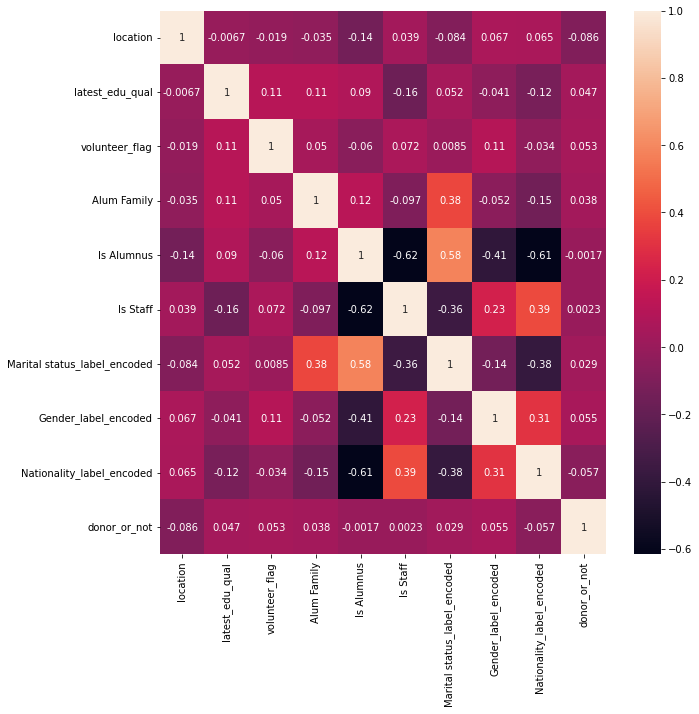

In [47]:
corr = df.corr()
# plot the heatmap
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot= True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 2 to 1157
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   location                      1015 non-null   int8 
 1   latest_edu_qual               1015 non-null   int8 
 2   volunteer_flag                1015 non-null   int8 
 3   Alum Family                   1015 non-null   int8 
 4   Is Alumnus                    1015 non-null   int8 
 5   Is Staff                      1015 non-null   int8 
 6   Marital status_label_encoded  1015 non-null   int8 
 7   Gender_label_encoded          1015 non-null   int8 
 8   Nationality_label_encoded     1015 non-null   int8 
 9   donor_or_not                  1015 non-null   int64
dtypes: int64(1), int8(9)
memory usage: 24.8 KB


## Split Data

split data to train and test (%80, %20) respectively
and strafify on y so that it is representitive  

In [27]:
X = df.drop('donor_or_not', axis =1)
y = df['donor_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((812, 9), (203, 9), (812,), (203,))

## Building model


using XGBoost with binary objective as I have only to have values in the target column (1, 0)

In [28]:
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

In [29]:
xgb.fit(X_train, y_train)
# make predictions
pred = xgb.predict(X_test)

## Evaluation 

In [30]:
f1_score(y_test, pred)

0.995049504950495

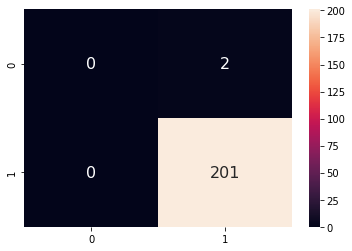

In [38]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot= True, annot_kws={"size": 16}, fmt='g')

## Conclusion



*   because the data was imbalance it was hard to tell whether the models would perform with the same accuracy in the real world.
*   the number of not donate is much much lower than the ones who donate   


*   even with a dumb model that always predict person as a donator, the model would have a high accuracy 


### suggestion:
 we have to gather more data about people who didn't donate because this would give model chance to find patterns about people who didn't donate.   


